In [23]:
import pandas as pd

df = pd.read_csv("LungCapData.csv")
print(df.head())



   Unnamed: 0  LungCap  Age  Height Smoke  Gender Caesarean
0           1    6.475    6    62.1    no    male        no
1           2   10.125   18    74.7   yes  female        no
2           3    9.550   16    69.7    no  female       yes
3           4   11.125   14    71.0    no    male        no
4           5    4.800    5    56.9    no    male        no


In [24]:
df.drop(columns=['Unnamed: 0'], inplace=True)
print(df.head())

   LungCap  Age  Height Smoke  Gender Caesarean
0    6.475    6    62.1    no    male        no
1   10.125   18    74.7   yes  female        no
2    9.550   16    69.7    no  female       yes
3   11.125   14    71.0    no    male        no
4    4.800    5    56.9    no    male        no


In [25]:
# Encoding the categorical variables
df['Smoke'] = df['Smoke'].map({'yes': 1, 'no': 0})
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})
df['Caesarean'] = df['Caesarean'].map({'yes': 1, 'no': 0})



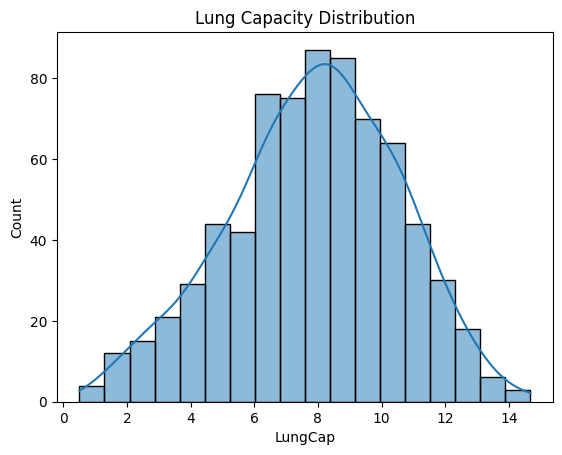

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['LungCap'], kde=True)
plt.title("Lung Capacity Distribution")
plt.show()


In [30]:
# creating a classification label
df['LungClass'] = df['LungCap'].apply(lambda x: 'Low' if x < 5 else 'High')



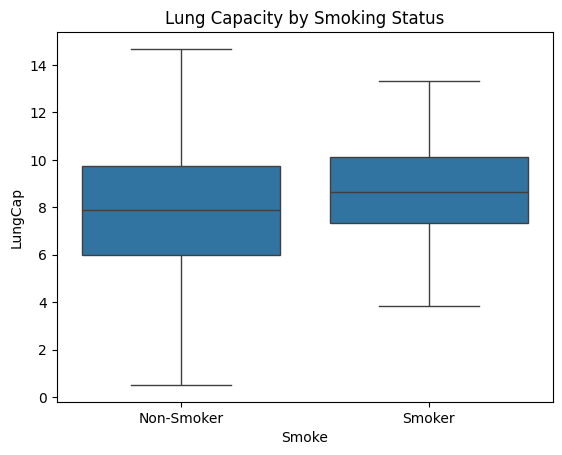

In [27]:
sns.boxplot(x='Smoke', y='LungCap', data=df)
plt.title("Lung Capacity by Smoking Status")
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()


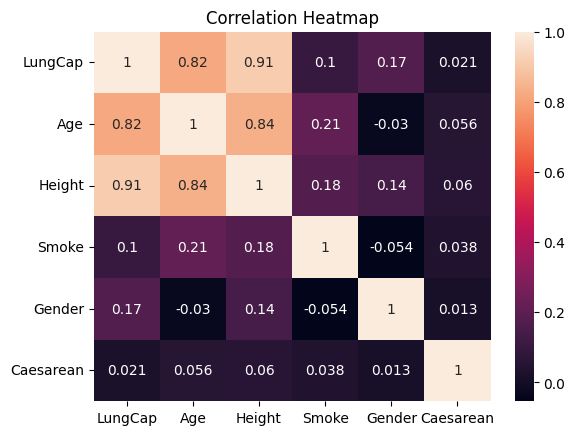

In [28]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df[['Age', 'Height', 'Smoke', 'Gender', 'Caesarean']]
y = df['LungClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8896551724137931
              precision    recall  f1-score   support

        High       0.93      0.93      0.93       123
         Low       0.64      0.64      0.64        22

    accuracy                           0.89       145
   macro avg       0.79      0.79      0.79       145
weighted avg       0.89      0.89      0.89       145

